# Доверительные интервалы на основе bootstrap

In [1]:
import numpy as np
import pandas as pd

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Загрузка данных

In [3]:
data = pd.read_csv('.\\bin\\stat.txt', sep='\t')
data.shape

(121, 2)

In [4]:
data.head()

,MinIntr,Graph
0,132,karate
1,100,karate
2,69,karate
3,161,karate
4,143,karate


In [5]:
data.Graph.value_counts()

karate      60
dolphins    30
lesmis      26
football     5
Name: Graph, dtype: int64

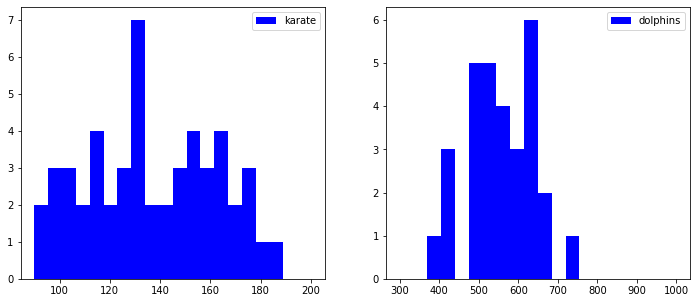

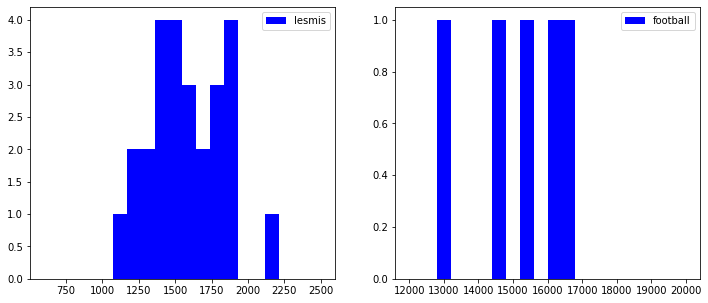

In [8]:
plt.figure(figsize(12, 5))
plt.subplot(1,2,1)
plt.hist(data[data.Graph == 'karate'].MinIntr, bins = 20, color = 'b', range = (90, 200), label = 'karate')
plt.legend()

plt.subplot(1,2,2)
plt.hist(data[data.Graph == 'dolphins'].MinIntr, bins = 20, color = 'b', range = (300, 1000), label = 'dolphins')
plt.legend()

plt.show()

plt.subplot(1,2,1)
plt.hist(data[data.Graph == 'lesmis'].MinIntr, bins = 20, color = 'b', range = (600, 2500), label = 'lesmis')
plt.legend()

plt.subplot(1,2,2)
plt.hist(data[data.Graph == 'football'].MinIntr, bins = 20, color = 'b', range = (12000, 20000), label = 'football')
plt.legend()

plt.show()

## Bootstrap

In [9]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [10]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

### Интервальная оценка медианы

In [11]:
karate_minIntr = data[data.Graph == 'karate'].MinIntr.values
dolphins_minIntr = data[data.Graph == 'dolphins'].MinIntr.values
lesmis_minIntr = data[data.Graph == 'lesmis'].MinIntr.values
football_minIntr = data[data.Graph == 'football'].MinIntr.values

In [12]:
np.random.seed(0)

karate_median_scores = list(map(np.median, get_bootstrap_samples(karate_minIntr, 1000)))
dolphins_median_scores = list(map(np.median, get_bootstrap_samples(dolphins_minIntr, 1000)))
lesmis_median_scores = list(map(np.median, get_bootstrap_samples(lesmis_minIntr, 1000)))
football_median_scores = list(map(np.median, get_bootstrap_samples(football_minIntr, 1000)))
print("95% confidence interval for random graphs. Median minimal number of intersections:")
print("'karate':\t",  list(map(int, stat_intervals(karate_median_scores, 0.05))))
print("'dolphins':\t",   list(map(int, stat_intervals(dolphins_median_scores, 0.05))))
print("'lesmis':\t",   list(map(int, stat_intervals(lesmis_median_scores, 0.05))))
print("'football':\t",   list(map(int, stat_intervals(football_median_scores, 0.05))))

95% confidence interval for random graphs. Median minimal number of intersections:
'karate':	 [124, 147]
'dolphins':	 [518, 606]
'lesmis':	 [1433, 1741]
'football':	 [13112, 16706]
